In [1]:
import numpy as np
%matplotlib inline

import pandas as pd

import sklearn
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

# Access the data

In [2]:
# Access the csv file
location = './API_19_DS2_en_csv_v2_801436.csv'
info = pd.read_csv(location,sep=',', skiprows=4)

info

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.776000,50.761000,50.746000,50.730000,50.715000,50.700000,...,42.940000,42.957000,42.990000,43.041000,43.108000,43.192000,43.293000,43.411000,NaN,NaN
1,Aruba,ABW,Urban population,SP.URB.TOTL,27526.000000,28141.000000,28532.000000,28761.000000,28924.000000,29082.000000,...,43819.000000,44057.000000,44348.000000,44665.000000,44979.000000,45296.000000,45616.000000,45948.000000,NaN,NaN
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,3.117931,2.209658,1.379868,0.799404,0.565140,0.544773,...,0.093611,0.541674,0.658336,0.712259,0.700552,0.702301,0.703980,0.725179,NaN,NaN
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.000000,55438.000000,56225.000000,56695.000000,57032.000000,57360.000000,...,102046.000000,102560.000000,103159.000000,103774.000000,104341.000000,104872.000000,105366.000000,105845.000000,NaN,NaN
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,3.148037,2.238144,1.409622,0.832453,0.592649,0.573468,...,0.370125,0.502430,0.582349,0.594397,0.544892,0.507618,0.469944,0.453576,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20059,Zimbabwe,ZWE,Rural land area where elevation is below 5 met...,AG.LND.EL5M.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20060,Zimbabwe,ZWE,Rural land area where elevation is below 5 met...,AG.LND.EL5M.RU.K2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20061,Zimbabwe,ZWE,Arable land (% of land area),AG.LND.ARBL.ZS,NaN,4.872690,5.001939,5.131188,5.260437,5.337986,...,10.856921,10.339925,10.339925,10.339925,10.339925,10.339925,NaN,NaN,NaN,NaN
20062,Zimbabwe,ZWE,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,28.396019,28.615743,28.835466,29.055189,29.223213,...,42.393693,41.876696,41.876696,41.876696,41.876696,41.876696,NaN,NaN,NaN,NaN


In [3]:
info.isnull().sum()

Country Name          0
Country Code          0
Indicator Name        0
Indicator Code        0
1960              16607
                  ...  
2016              14842
2017              16223
2018              16892
2019              19874
Unnamed: 64       20064
Length: 65, dtype: int64

# Clean the data

In [4]:
# Replace NaN with 0
for i in info.columns:  
    info[i].fillna(0, inplace=True)
    
info.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.776000,50.761000,50.746000,50.730000,50.715000,50.700000,...,42.940000,42.957000,42.990000,43.041000,43.108000,43.192000,43.293000,43.411000,0.0,0.0
1,Aruba,ABW,Urban population,SP.URB.TOTL,27526.000000,28141.000000,28532.000000,28761.000000,28924.000000,29082.000000,...,43819.000000,44057.000000,44348.000000,44665.000000,44979.000000,45296.000000,45616.000000,45948.000000,0.0,0.0
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,3.117931,2.209658,1.379868,0.799404,0.565140,0.544773,...,0.093611,0.541674,0.658336,0.712259,0.700552,0.702301,0.703980,0.725179,0.0,0.0
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.000000,55438.000000,56225.000000,56695.000000,57032.000000,57360.000000,...,102046.000000,102560.000000,103159.000000,103774.000000,104341.000000,104872.000000,105366.000000,105845.000000,0.0,0.0
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,3.148037,2.238144,1.409622,0.832453,0.592649,0.573468,...,0.370125,0.502430,0.582349,0.594397,0.544892,0.507618,0.469944,0.453576,0.0,0.0


In [5]:
# Now there are no NaN values in the data set
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20064 entries, 0 to 20063
Data columns (total 65 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    20064 non-null  object 
 1   Country Code    20064 non-null  object 
 2   Indicator Name  20064 non-null  object 
 3   Indicator Code  20064 non-null  object 
 4   1960            20064 non-null  float64
 5   1961            20064 non-null  float64
 6   1962            20064 non-null  float64
 7   1963            20064 non-null  float64
 8   1964            20064 non-null  float64
 9   1965            20064 non-null  float64
 10  1966            20064 non-null  float64
 11  1967            20064 non-null  float64
 12  1968            20064 non-null  float64
 13  1969            20064 non-null  float64
 14  1970            20064 non-null  float64
 15  1971            20064 non-null  float64
 16  1972            20064 non-null  float64
 17  1973            20064 non-null 

In [6]:
# The "Unnamed: 64" column has no data, so let's get ride of it.
info = info.drop(columns='Unnamed: 64')
info

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.776000,50.761000,50.746000,50.730000,50.715000,50.700000,...,43.059000,42.940000,42.957000,42.990000,43.041000,43.108000,43.192000,43.293000,43.411000,0.0
1,Aruba,ABW,Urban population,SP.URB.TOTL,27526.000000,28141.000000,28532.000000,28761.000000,28924.000000,29082.000000,...,43778.000000,43819.000000,44057.000000,44348.000000,44665.000000,44979.000000,45296.000000,45616.000000,45948.000000,0.0
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,3.117931,2.209658,1.379868,0.799404,0.565140,0.544773,...,-0.626205,0.093611,0.541674,0.658336,0.712259,0.700552,0.702301,0.703980,0.725179,0.0
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.000000,55438.000000,56225.000000,56695.000000,57032.000000,57360.000000,...,101669.000000,102046.000000,102560.000000,103159.000000,103774.000000,104341.000000,104872.000000,105366.000000,105845.000000,0.0
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,3.148037,2.238144,1.409622,0.832453,0.592649,0.573468,...,0.210709,0.370125,0.502430,0.582349,0.594397,0.544892,0.507618,0.469944,0.453576,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20059,Zimbabwe,ZWE,Rural land area where elevation is below 5 met...,AG.LND.EL5M.RU.ZS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
20060,Zimbabwe,ZWE,Rural land area where elevation is below 5 met...,AG.LND.EL5M.RU.K2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
20061,Zimbabwe,ZWE,Arable land (% of land area),AG.LND.ARBL.ZS,0.000000,4.872690,5.001939,5.131188,5.260437,5.337986,...,10.339925,10.856921,10.339925,10.339925,10.339925,10.339925,10.339925,0.000000,0.000000,0.0
20062,Zimbabwe,ZWE,Agricultural land (% of land area),AG.LND.AGRI.ZS,0.000000,28.396019,28.615743,28.835466,29.055189,29.223213,...,41.876696,42.393693,41.876696,41.876696,41.876696,41.876696,41.876696,0.000000,0.000000,0.0


# Indicators

In [7]:
# The indicator I have choosen is Urban Population (% of total population)
# First, let copy the dataset into another variable
urban_popu = info.copy()

#Now, delete all the rows that are not the Urban Population
urban_popu = urban_popu[urban_popu['Indicator Code'] == 'SP.URB.TOTL.IN.ZS']

# Then, delete all the columns that are not usefull
urban_popu = urban_popu.drop(columns=['Country Name', 'Indicator Name', 'Indicator Code'])

# Last but not least, convert the Country Codes into float
for i in ['Country Code']:
    urban_popu[i] = urban_popu[i].astype('category')
col = urban_popu.select_dtypes(['category']).columns
urban_popu[col] = urban_popu[col].apply(lambda x: x.cat.codes)

# Delete empty rows (countries without data) 
urban_popu = urban_popu[urban_popu['2018'] != 0]

# Reset the index
urban_popu = urban_popu.reset_index()

# With this data, we can use the K-means
urban_popu

,index,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,0,0,50.776,50.761,50.746,50.730,50.715,50.700,50.685,50.670,...,43.059,42.940,42.957,42.990,43.041,43.108,43.192,43.293,43.411,0.0
1,76,1,8.401,8.684,8.976,9.276,9.586,9.904,10.233,10.570,...,23.737,23.948,24.160,24.373,24.587,24.803,25.020,25.250,25.495,0.0
2,152,2,10.435,10.798,11.204,11.624,12.058,12.504,12.965,13.441,...,59.783,60.528,61.268,62.002,62.731,63.446,64.149,64.839,65.514,0.0
3,228,3,30.705,30.943,31.015,31.086,31.158,31.230,31.302,31.374,...,52.163,53.247,54.330,55.387,56.423,57.434,58.421,59.383,60.319,0.0
4,304,4,58.450,60.983,63.462,65.872,68.205,70.445,72.593,74.641,...,88.819,88.726,88.631,88.537,88.441,88.345,88.248,88.150,88.062,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,19608,258,18.926,18.986,19.061,19.141,19.221,19.301,19.382,19.593,...,20.078,19.857,19.624,19.385,19.149,18.914,18.681,18.452,18.243,0.0
256,19760,260,9.100,9.459,9.831,10.216,10.614,11.026,11.451,11.891,...,31.776,32.364,32.958,33.559,34.165,34.777,35.394,36.016,36.642,0.0
257,19836,261,46.619,46.793,46.906,47.020,47.134,47.248,47.362,47.476,...,62.218,62.746,63.272,63.793,64.312,64.828,65.341,65.850,66.355,0.0
258,19912,262,18.145,18.951,19.785,20.712,22.015,23.372,24.789,26.261,...,39.355,39.851,40.354,40.865,41.382,41.907,42.438,42.976,43.521,0.0


In [8]:
# The other indicator I have choosen is Mortality Rate (per 1000 births)
# First, let copy the dataset into another variable
mortality_rate = info.copy()

#Now, delete all the rows that are not the Mortality Rate (per 1000 births)
mortality_rate = mortality_rate[mortality_rate['Indicator Code'] == 'SH.DYN.MORT']

# Then, delete all the columns that are not usefull
mortality_rate = mortality_rate.drop(columns=['Country Name', 'Indicator Name', 'Indicator Code'])

# Last but not least, convert the Country Codes into float
for i in ['Country Code']:
    mortality_rate[i] = mortality_rate[i].astype('category')
col = mortality_rate.select_dtypes(['category']).columns
mortality_rate[col] = mortality_rate[col].apply(lambda x: x.cat.codes)

# Delete empty rows (countries without data) 
mortality_rate = mortality_rate[mortality_rate['2015'] != 0]

# Reset the index
mortality_rate = mortality_rate.reset_index()

# With this data, we can use the K-means
mortality_rate

,index,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,84,1,0.0,350.9,345.3,340.1,334.9,329.6,324.3,319.0,...,88.000000,84.10000,80.500000,76.900000,73.60000,70.400000,67.500000,64.700000,62.300000,0.0
1,160,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,120.500000,112.50000,104.900000,98.400000,92.90000,88.100000,84.000000,80.400000,77.200000,0.0
2,236,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.300000,12.30000,11.400000,10.700000,10.00000,9.600000,9.300000,9.000000,8.800000,0.0
3,312,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.200000,4.00000,3.800000,3.600000,3.40000,3.300000,3.100000,3.000000,2.900000,0.0
4,388,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,42.737694,41.41839,40.259938,39.160848,38.20436,37.273094,36.507319,35.714696,34.992937,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,19616,258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.700000,18.50000,18.300000,17.900000,17.60000,17.200000,16.700000,16.200000,15.800000,0.0
235,19768,260,0.0,0.0,409.4,402.0,393.9,385.0,375.1,363.9,...,56.000000,55.10000,55.000000,55.000000,55.00000,55.000000,55.000000,55.000000,55.000000,0.0
236,19844,261,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,52.500000,46.70000,43.300000,41.200000,39.50000,37.700000,36.600000,35.300000,33.800000,0.0
237,19920,262,205.6,201.6,197.9,194.7,192.1,190.1,188.7,187.7,...,80.300000,77.20000,74.300000,70.700000,66.90000,64.600000,62.000000,59.400000,57.800000,0.0


In [9]:
# Get the dataset with the same countries for each dataset
list_countries = []
for i in range(0,urban_popu.shape[0]):
    for j in range(0,mortality_rate.shape[0]):
        if urban_popu['Country Code'][i] == mortality_rate['Country Code'][j]:
                list_countries.append(urban_popu['Country Code'][i])

# The number of countries that are in both lists
len(list_countries)

238

In [10]:
# Delete the rows that are not in both sets
deleteRow = 1
for i in range(0,urban_popu.shape[0]):
    deleteRow = 1
    for j in range(0, len(list_countries)):
        if urban_popu['Country Code'][i] == list_countries[j]:
            deleteRow = 0
    if deleteRow == 1:
        urban_popu = urban_popu.drop(i, axis=0)
  
urban_popu

,index,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,76,1,8.401000,8.684000,8.976000,9.276000,9.586000,9.9040,10.23300,10.57000,...,23.737000,23.948000,24.160000,24.373000,24.58700,24.803000,25.020000,25.250000,25.495000,0.0
2,152,2,10.435000,10.798000,11.204000,11.624000,12.058000,12.5040,12.96500,13.44100,...,59.783000,60.528000,61.268000,62.002000,62.73100,63.446000,64.149000,64.839000,65.514000,0.0
3,228,3,30.705000,30.943000,31.015000,31.086000,31.158000,31.2300,31.30200,31.37400,...,52.163000,53.247000,54.330000,55.387000,56.42300,57.434000,58.421000,59.383000,60.319000,0.0
4,304,4,58.450000,60.983000,63.462000,65.872000,68.205000,70.4450,72.59300,74.64100,...,88.819000,88.726000,88.631000,88.537000,88.44100,88.345000,88.248000,88.150000,88.062000,0.0
5,380,5,31.234143,31.979919,32.729129,33.501597,34.303597,35.1477,35.94979,36.64106,...,56.440879,56.791948,57.098537,57.400939,57.69248,58.031467,58.345275,58.641483,58.925419,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,19608,258,18.926000,18.986000,19.061000,19.141000,19.221000,19.3010,19.38200,19.59300,...,20.078000,19.857000,19.624000,19.385000,19.14900,18.914000,18.681000,18.452000,18.243000,0.0
256,19760,260,9.100000,9.459000,9.831000,10.216000,10.614000,11.0260,11.45100,11.89100,...,31.776000,32.364000,32.958000,33.559000,34.16500,34.777000,35.394000,36.016000,36.642000,0.0
257,19836,261,46.619000,46.793000,46.906000,47.020000,47.134000,47.2480,47.36200,47.47600,...,62.218000,62.746000,63.272000,63.793000,64.31200,64.828000,65.341000,65.850000,66.355000,0.0
258,19912,262,18.145000,18.951000,19.785000,20.712000,22.015000,23.3720,24.78900,26.26100,...,39.355000,39.851000,40.354000,40.865000,41.38200,41.907000,42.438000,42.976000,43.521000,0.0


In [11]:
deleteRow = 1
for i in range(0,mortality_rate.shape[0]):
    deleteRow = 1
    for j in range(0, len(list_countries)):
        if mortality_rate['Country Code'][i] == list_countries[j]:
            deleteRow = 0
    if deleteRow == 1:
        mortality_rate = mortality_rate.drop(i, axis=0)
        
mortality_rate

,index,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,84,1,0.0,350.9,345.3,340.1,334.9,329.6,324.3,319.0,...,88.000000,84.10000,80.500000,76.900000,73.60000,70.400000,67.500000,64.700000,62.300000,0.0
1,160,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,120.500000,112.50000,104.900000,98.400000,92.90000,88.100000,84.000000,80.400000,77.200000,0.0
2,236,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.300000,12.30000,11.400000,10.700000,10.00000,9.600000,9.300000,9.000000,8.800000,0.0
3,312,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.200000,4.00000,3.800000,3.600000,3.40000,3.300000,3.100000,3.000000,2.900000,0.0
4,388,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,42.737694,41.41839,40.259938,39.160848,38.20436,37.273094,36.507319,35.714696,34.992937,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,19616,258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.700000,18.50000,18.300000,17.900000,17.60000,17.200000,16.700000,16.200000,15.800000,0.0
235,19768,260,0.0,0.0,409.4,402.0,393.9,385.0,375.1,363.9,...,56.000000,55.10000,55.000000,55.000000,55.00000,55.000000,55.000000,55.000000,55.000000,0.0
236,19844,261,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,52.500000,46.70000,43.300000,41.200000,39.50000,37.700000,36.600000,35.300000,33.800000,0.0
237,19920,262,205.6,201.6,197.9,194.7,192.1,190.1,188.7,187.7,...,80.300000,77.20000,74.300000,70.700000,66.90000,64.600000,62.000000,59.400000,57.800000,0.0


In [12]:
# Now I am going to combine the information of mortality and population
indicators_popu_mort = []
for i in range(1990,2015):
    indicators_popu_mort.append([])
    for x, y in zip(urban_popu[''+str(i)+''],mortality_rate[''+str(i)+'']):
        indicators_popu_mort[i-1990].append([x,y])

# Use the K-Means

In [13]:
clustering = KMeans(n_clusters=4, random_state=2)

# Plot the data

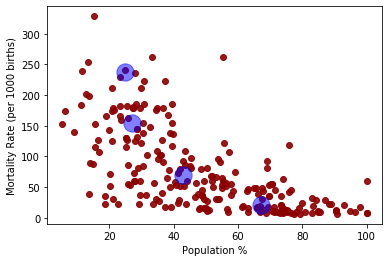

In [14]:
# Output for 1990
output1990 = clustering.fit_predict(indicators_popu_mort[1990-1990])
centers = clustering.cluster_centers_

X = np.array(indicators_popu_mort[1990-1990])[:,0]
Y = np.array(indicators_popu_mort[1990-1990])[:,1]

plt.scatter(X,Y, c='darkred', alpha=0.9)
plt.xlabel("Population %")
plt.ylabel("Mortality Rate (per 1000 births)")
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=300, alpha=0.5);

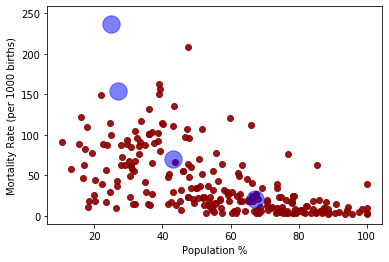

In [15]:
# Output for 2010
output2010 = clustering.fit_predict(indicators_popu_mort[2010-1990])

X = np.array(indicators_popu_mort[2010-1990])[:,0]
Y = np.array(indicators_popu_mort[2010-1990])[:,1]

plt.scatter(X,Y, c='darkred', alpha=0.9)
plt.xlabel("Population %")
plt.ylabel("Mortality Rate (per 1000 births)")
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=300, alpha=0.5);

# Which countries have changed of cluster?

In [16]:
# In cluster 3 (the forth) there are countries with a large mortality rate and small population
# In cluster 1 the mortality rate has decreased 100 points but the population remains almost the same
centers

array([[ 42.97931532,  69.90466071],
       [ 26.91946733, 154.22581563],
       [ 67.19945615,  21.2270059 ],
       [ 25.00907143, 237.34285714]])

In [17]:
# I am going to study which countries have changed from cluster 3_1
# This will mean that the country has solved a bit its mortality problem
countries_3_1 = []
for i in range(urban_popu.shape[0]):
    if output1990[i] != output2010[i]:
        if (output1990[i] == 3) and (output2010[i] == 1):
            countries_3_1.append(i)

print('The number of countries that have passed from cluster 3 to 1 is: ') 
print(len(countries_3_1))

The number of countries that have passed from cluster 3 to 1 is: 
14


In [18]:
# Get the names of the countries
countries_name = []
for i in range(0,len(countries_3_1)):
    countries_name.append(info['Country Name'][countries_3_1[i]*76])

countries_name

['Afghanistan',
 'Belgium',
 'Europe & Central Asia',
 'Fiji',
 'Faroe Islands',
 'Jamaica',
 'Lesotho',
 'St. Martin (French part)',
 'Moldova',
 'Mexico',
 'Marshall Islands',
 'Papua New Guinea',
 'Paraguay',
 'Sudan']

# Why they have changed of cluster?

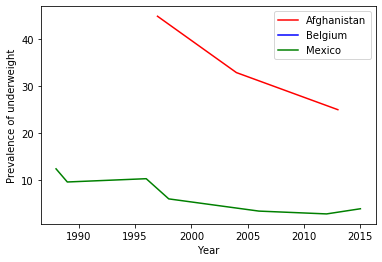

In [19]:
# Now I am going to select 3 countries and I will see their data over the years to try to get an explanation
# I will choose Belgium (High income), Mexico (Upper middle income) and Afghanistan (Low income)

# I will study the following values over the years:
#   - Prevalence of underweight (% of children under 5) --> SH.STA.MALN.ZS
#   - Poverty headcount ratio (% of population) --> SI.POV.DDAY
#   - Total greenhouse gas emissions (kt of CO2 equivalent) --> EN.ATM.GHGT.KT.CE

# Let's plot the underweight of the 3 countries

data_country = info[(info['Indicator Code'] == 'SH.STA.MALN.ZS')]
data_country = data_country.reset_index()
for i in range(0,data_country.shape[0]):
    if(data_country['Country Name'][i] != 'Belgium' and data_country['Country Name'][i] != 'Afghanistan' and data_country['Country Name'][i] != 'Mexico'):
        data_country = data_country.drop(i, axis=0)

data_country = data_country.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code', 'index', 'Country Name'])  
data_country = data_country.reset_index(drop=True)

# Afghanistan
X_under = []
Y_under = []
for i in range(0,2019-1960):
    col = str(1960+i)
    if data_country[col][0] != 0:
        X_under.append(i+1960)
        Y_under.append(data_country[col][0])

plt.plot(X_under,Y_under, c='red', label="Afghanistan")

# Belgium
X_under = []
Y_under = []
for i in range(0,2019-1960):
    col = str(1960+i)
    if data_country[col][1] != 0:
        X_under.append(i+1960)
        Y_under.append(data_country[col][1])

plt.plot(X_under,Y_under, c='blue', label="Belgium")

# Mexico
X_under = []
Y_under = []
for i in range(0,2019-1960):
    col = str(1960+i)
    if data_country[col][2] != 0:
        X_under.append(i+1960)
        Y_under.append(data_country[col][2])

plt.plot(X_under,Y_under, c='green', label="Mexico")


plt.xlabel("Year")
plt.ylabel("Prevalence of underweight")
plt.legend()
plt.show()

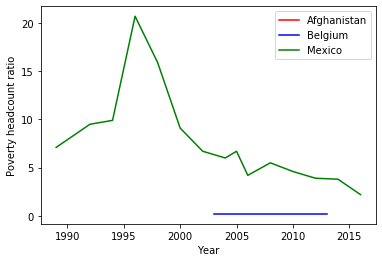

In [20]:
# Let's plot the poverty of the 3 countries

data_country = info[(info['Indicator Code'] == 'SI.POV.DDAY')]
data_country = data_country.reset_index()
for i in range(0,data_country.shape[0]):
    if(data_country['Country Name'][i] != 'Belgium' and data_country['Country Name'][i] != 'Afghanistan' and data_country['Country Name'][i] != 'Mexico'):
        data_country = data_country.drop(i, axis=0)

data_country = data_country.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code', 'index', 'Country Name'])  
data_country = data_country.reset_index(drop=True)

# Afghanistan
X_under = []
Y_under = []
for i in range(0,2019-1960):
    col = str(1960+i)
    if data_country[col][0] != 0:
        X_under.append(i+1960)
        Y_under.append(data_country[col][0])

plt.plot(X_under,Y_under, c='red', label="Afghanistan")

# Belgium
X_under = []
Y_under = []
for i in range(0,2019-1960):
    col = str(1960+i)
    if data_country[col][1] != 0:
        X_under.append(i+1960)
        Y_under.append(data_country[col][1])

plt.plot(X_under,Y_under, c='blue', label="Belgium")

# Mexico
X_under = []
Y_under = []
for i in range(0,2019-1960):
    col = str(1960+i)
    if data_country[col][2] != 0:
        X_under.append(i+1960)
        Y_under.append(data_country[col][2])

plt.plot(X_under,Y_under, c='green', label="Mexico")


plt.xlabel("Year")
plt.ylabel("Poverty headcount ratio")
plt.legend()
plt.show()

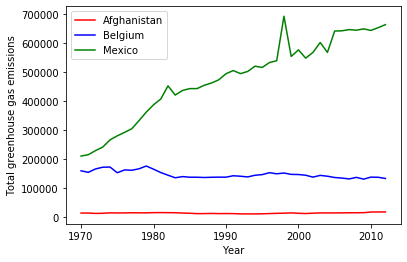

In [21]:
# Let's plot the total greenhouse gas emissions of the 3 countries

data_country = info[(info['Indicator Code'] == 'EN.ATM.GHGT.KT.CE')]
data_country = data_country.reset_index()
for i in range(0,data_country.shape[0]):
    if(data_country['Country Name'][i] != 'Belgium' and data_country['Country Name'][i] != 'Afghanistan' and data_country['Country Name'][i] != 'Mexico'):
        data_country = data_country.drop(i, axis=0)

data_country = data_country.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code', 'index', 'Country Name'])  
data_country = data_country.reset_index(drop=True)

# Afghanistan
X_under = []
Y_under = []
for i in range(0,2019-1960):
    col = str(1960+i)
    if data_country[col][0] != 0:
        X_under.append(i+1960)
        Y_under.append(data_country[col][0])

plt.plot(X_under,Y_under, c='red', label="Afghanistan")

# Belgium
X_under = []
Y_under = []
for i in range(0,2019-1960):
    col = str(1960+i)
    if data_country[col][1] != 0:
        X_under.append(i+1960)
        Y_under.append(data_country[col][1])

plt.plot(X_under,Y_under, c='blue', label="Belgium")

# Mexico
X_under = []
Y_under = []
for i in range(0,2019-1960):
    col = str(1960+i)
    if data_country[col][2] != 0:
        X_under.append(i+1960)
        Y_under.append(data_country[col][2])

plt.plot(X_under,Y_under, c='green', label="Mexico")


plt.xlabel("Year")
plt.ylabel("Total greenhouse gas emissions")
plt.legend()
plt.show()